<p style="font-size:small; color:gray;"> Author: 鄭永誠, Year: 2024 </p>

# C0-前置作業與基礎工具
-----------------------
## 建立虛擬環境
養成好習慣，建立虛擬環境去避免套件版本衝突和一堆麻煩的問題

### 1. 安裝 Python 擴展：

由於下面範例用到ipynb格式檔案，若要在vscode上使用我的code進行操作，要確保你已經安裝了 Python 擴展和 Jupyter 擴展。  
在 VS Code 的左側「延伸模組」中搜尋並安裝 "Python" 和 "Jupyter" 

**你若在vscode上開啟ipynb檔，理論上可以直接透過按右上「選取核心」（Kernel Selector）  
直接選擇要用的 Python 虛擬環境或內核，省略以下指令操作步驟**

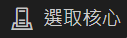  
-
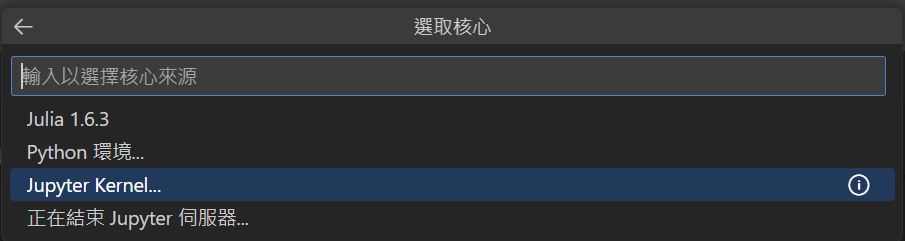 
-
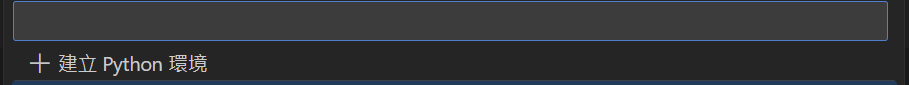  
-
### 2. 開啟終端機：

在 VS Code 中，打開Termina (終端機)
- 方法1. 上方點選Terminal(終端機) > New Terminal (新增終端) 來打開它。  
- 方法2. 快捷鍵  ctrl + \` (數字1左邊那個)；mac 則是 Cmd + \`  

### 3. 創建虛擬環境：

在終端機中，在你的目標專案目錄下，然後運行以下命令來創建虛擬環境：  
```
python -m venv llm_venv
```
(用python命令; -m 模組執行 venv 模組；建立的模組名稱叫做llm_venv)  

這會在你的專案目錄中創建一個名為 venv 的虛擬環境 (你可以看到資料夾)。  
你可以將 llm_venv 替換為任何你喜歡的名稱。

### 4. 啟用虛擬環境：

啟用虛擬環境的命令取決於你使用的操作系統：

Windows:  

```
.\venv\Scripts\Activate
```

macOS/Linux:  

```
source venv/bin/activate
```

如果要退出虛擬環境，在終端機上輸入  
```
deactivate
```


### 5. 安裝 Jupyter：

在虛擬環境中安裝 Jupyter：  

```
pip install jupyter
```

安裝 IPython kernel：    
```
pip install ipykernel
```   
創建虛擬環境的 Jupyter kernel：  

```
python -m ipykernel install --user --name=venv --display-name "Python (llm_venv)"
```
這裡的 --name 可以是任何你喜歡的名稱，--display-name 是在 Jupyter Notebook 中顯示的名稱。  


### 6. 選擇虛擬環境作為 Jupyter Notebook 的內核：
在 VS Code 中打開你的 Jupyter Notebook 文件（.ipynb）。  
點擊右上角的內核選擇器（Kernel Selector），  
選擇你剛剛創建的內核（例如 “Python (venv)”）


--------------
## 後面會用到的一些小套件/程式補充
### # textwrap: 用來處理文字的套件

In [1]:
""" textwrap函式範例 """

import textwrap

# 原始文本
sample_text = """
    This is an example of text that will be wrapped using the textwrap module in Python.
    It demonstrates the basic usage of wrapping text into multiple lines of a specified width.
"""

print("原始文本: \n", sample_text)

# 使用 wrap 函數 (將 text 包裝到指定的寬度)
wrapped_lines = textwrap.wrap(sample_text, width=50)
print("Wrapped lines 效果:")
for line in wrapped_lines:
    print(line)
    
# 使用 fill 函數 (將 text 填充到指定的寬度)
filled_text = textwrap.fill(sample_text, width=50)
print("\nfill 效果: \n", filled_text)

# 使用 shorten 函數 (將 text 縮短到指定的長度)
shortened_text = textwrap.shorten(sample_text, width=50)
print("\nshorten 效果: \n", filled_text)

# 使用 dedent 函數 (移除 text 中每一行的任何相同前缀空白符)
dedented_text = textwrap.dedent(sample_text)
print("\nDedented 效果: \n", dedented_text)

原始文本: 
 
    This is an example of text that will be wrapped using the textwrap module in Python.
    It demonstrates the basic usage of wrapping text into multiple lines of a specified width.

Wrapped lines 效果:
     This is an example of text that will be
wrapped using the textwrap module in Python.
It demonstrates the basic usage of wrapping text
into multiple lines of a specified width.

fill 效果: 
      This is an example of text that will be
wrapped using the textwrap module in Python.
It demonstrates the basic usage of wrapping text
into multiple lines of a specified width.

shorten 效果: 
      This is an example of text that will be
wrapped using the textwrap module in Python.
It demonstrates the basic usage of wrapping text
into multiple lines of a specified width.

Dedented 效果: 
 
This is an example of text that will be wrapped using the textwrap module in Python.
It demonstrates the basic usage of wrapping text into multiple lines of a specified width.



### # os.getenv: 用來讀取 .env 檔案
我把 .env 檔案放在專案的根目錄，  
然後使用 python-dotenv 這個套件來讀取 .env 檔案  
(我把後面範例的API金鑰藏在裡面了!!!)      

所以實際操作時，  
請自己在同路徑下建立一個.env檔 (直接取名叫.env即可)  
裡面放上你申請到的金鑰資訊  
放心，我都是使用可以免費取的API進行範例


In [1]:
""" 僅用code示意建立.env檔，實際上直接透過UI建立即可 """
# 建立檔案路徑名稱
env_file_path = '.env'

# 定義檔案裡鑰新增的資訊
env_content = "HAHA_API_KEY='ABC123'"

# Write the content to the .env file
with open(env_file_path, 'w') as file:
    file.write(env_content)

print(f"此時你生成一個.env檔包含以下資訊:\n{env_content}")

此時你生成一個.env檔包含以下資訊:
HAHA_API_KEY='ABC123'


In [3]:
""" 如何在程式中使用.env檔案 """
import os

# 讀取.env檔案並取得HAHA_API_KEY內容
api_key=os.getenv('HAHA_API_KEY')

# 嘗試印出HAHA_API_KEY (要重新啟動Kernal才能讀取到)
print(api_key)

ABC123


In [1]:
# 偷偷放幾個自己要用的程式碼，別理會
!pip freeze > requirements.txt